## Different extensions for 2d sin function

This notebook studies the convergence behavior of the MSE over the number of function and derivative observations.

Additionally the model is trained on the $[0,\pi]\times[0,\pi]$ square and then tested on $[0,1.5\pi]\times[0,1.5\pi]$ and $[0,2\pi]\times[0,2\pi]$.

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import testfunctions, optimizertesting

In [ ]:
optimizers = ["L-BFGS-B", "TNC", "SLSQP"]

fun = testfunctions.sin2d
num_gridpoints = jnp.array([100,100])

in_dir = "./data_files/different_number_of_datapoints/extended/periodic"

noise = 0.1
seed = 0

f_vals = [1, 5, 20, 50]
d_vals = [5, 20, 50, 100, 200, 400, 800]

iters_per_optimizer = 5

test_rans = [(jnp.array([0.0,1.5*jnp.pi]), jnp.array([0.0,1.5*jnp.pi])),
                (jnp.array([0.0,2*jnp.pi]), jnp.array([0.0,2*jnp.pi]))]
names = ["1.5"]#, "2.0"]

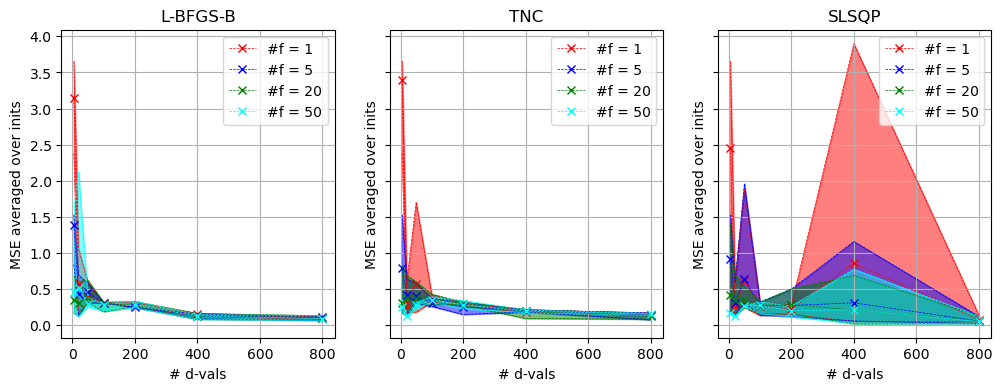

In [ ]:
colors = ["r", "b", "g", "cyan"]

for i,(name, test_ran) in enumerate(zip(names, test_rans)):
    fig, ax = plt.subplots(1,len(optimizers),figsize=(12,4),sharey=True)

    _, Y = optimizertesting.create_training_data_2D(0, num_gridpoints, test_ran, 0.0, fun)
    Y = Y[:,0]
    for j,optimizer in enumerate(optimizers):
        for color,num_f_vals in zip(colors,f_vals):
            avg = []
            mini = []
            maxi = []
            for num_d_vals in d_vals:
                means = jnp.load(f"{in_dir}/sin_{name}pi_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")

                avg_mse = 0
                min_mse = jnp.inf
                max_mse = -jnp.inf
                for iter, mean in enumerate(means.values()):
                    mse = jnp.mean((Y-mean)**2)
                    if mse < min_mse: min_mse = mse
                    if mse > max_mse: max_mse = mse
                    avg_mse += mse
                avg_mse /= iter + 1

                avg.append(avg_mse)
                mini.append(min_mse)
                maxi.append(max_mse)
            ax[j].plot(d_vals,avg,marker="x", lw=.5, ls="--",label=f"#f = {num_f_vals}", color=color)
            ax[j].plot(d_vals,mini, lw=.5, ls="--", color=color)
            ax[j].plot(d_vals,maxi, lw=.5, ls="--", color=color)
            ax[j].fill_between(d_vals, mini, maxi,alpha=0.5, color=color)
        ax[j].grid()
        ax[j].legend()
        ax[j].set_xlabel("# d-vals")
        ax[j].set_ylabel("MSE averaged over inits")
        ax[j].set_title(optimizer)

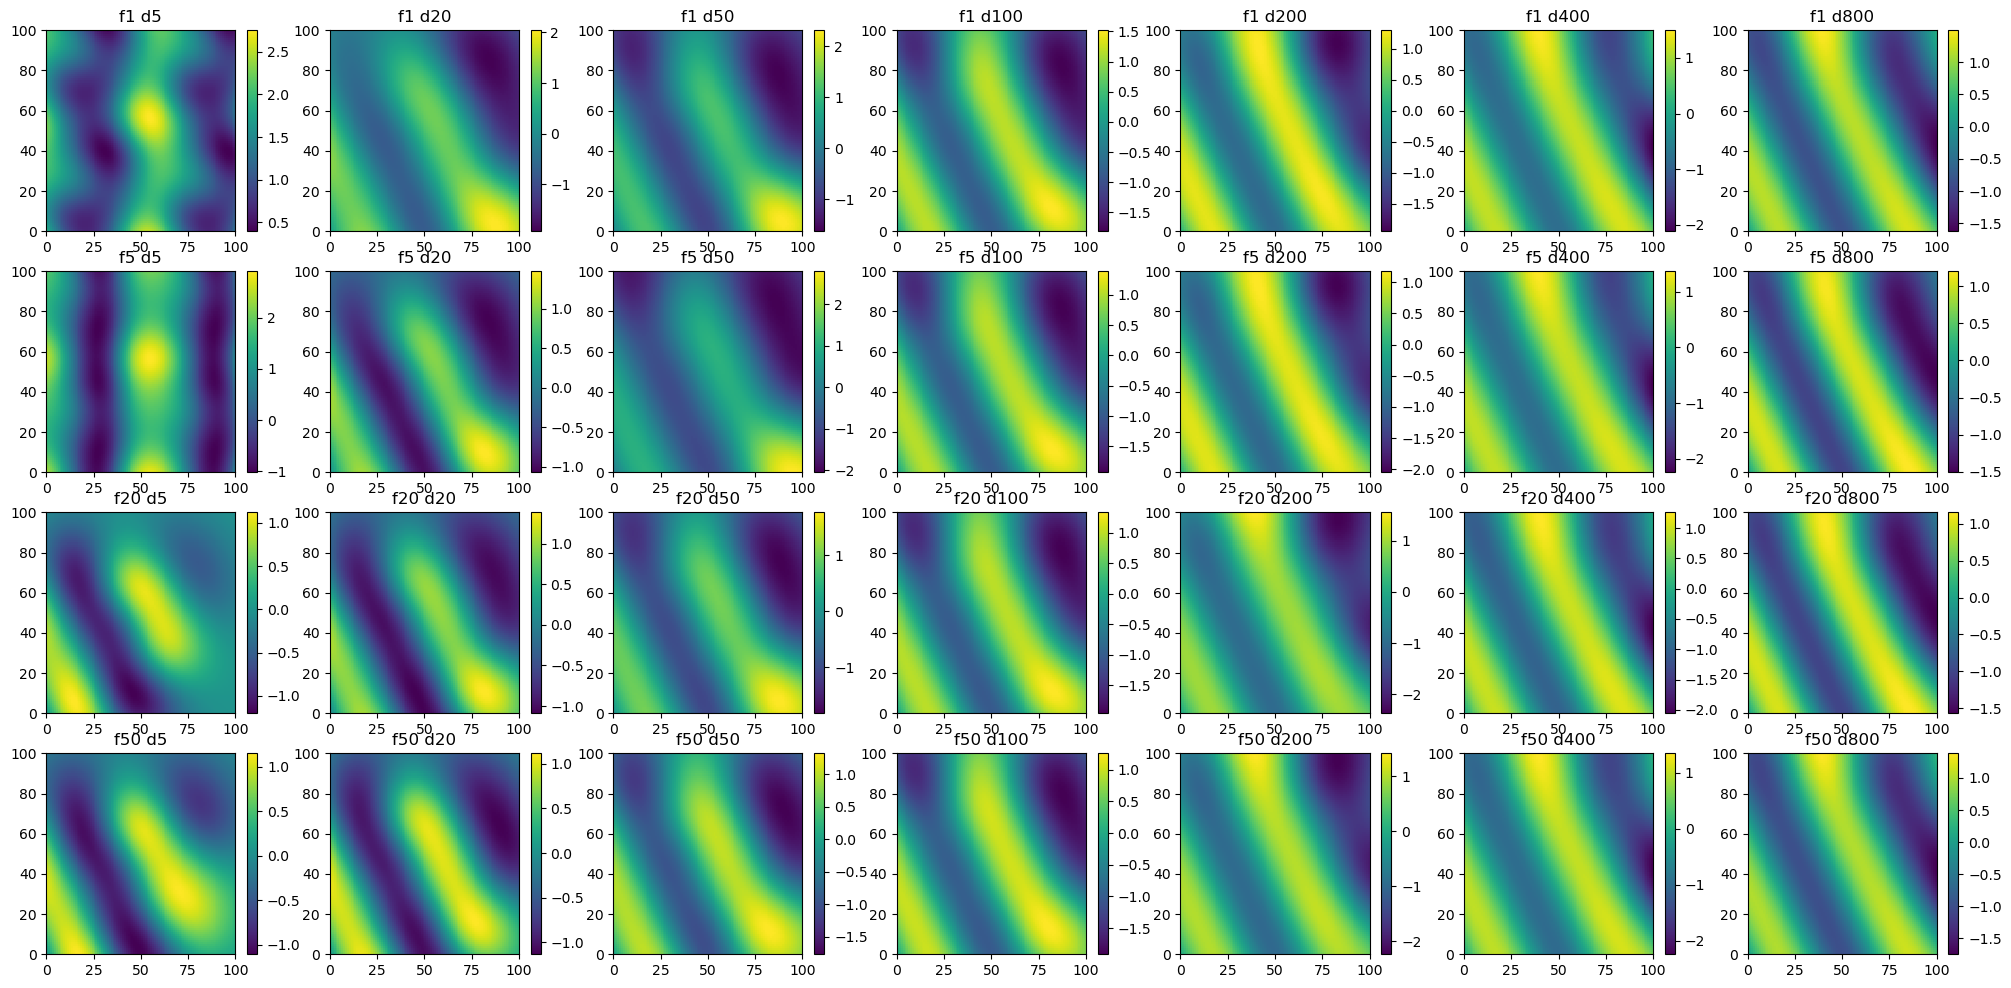

In [ ]:
# optimizer = "TNC"
optimizer = "L-BFGS-B"
# optimizer = "SLSQP"

for name, test_ran in zip(names, test_rans):
    fig, ax = plt.subplots(4,7, figsize=(25,12))
    for i,num_f_vals in enumerate(f_vals):
        for j,num_d_vals in enumerate(d_vals):
            means = jnp.load(f"{in_dir}/sin_{name}pi_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")
            mean = means["arr_1"]
            
            ax[i,j].set_title(f"f{num_f_vals} d{num_d_vals}")
            im = ax[i,j].pcolormesh(mean.reshape(100,100))
            fig.colorbar(im, ax=ax[i,j])

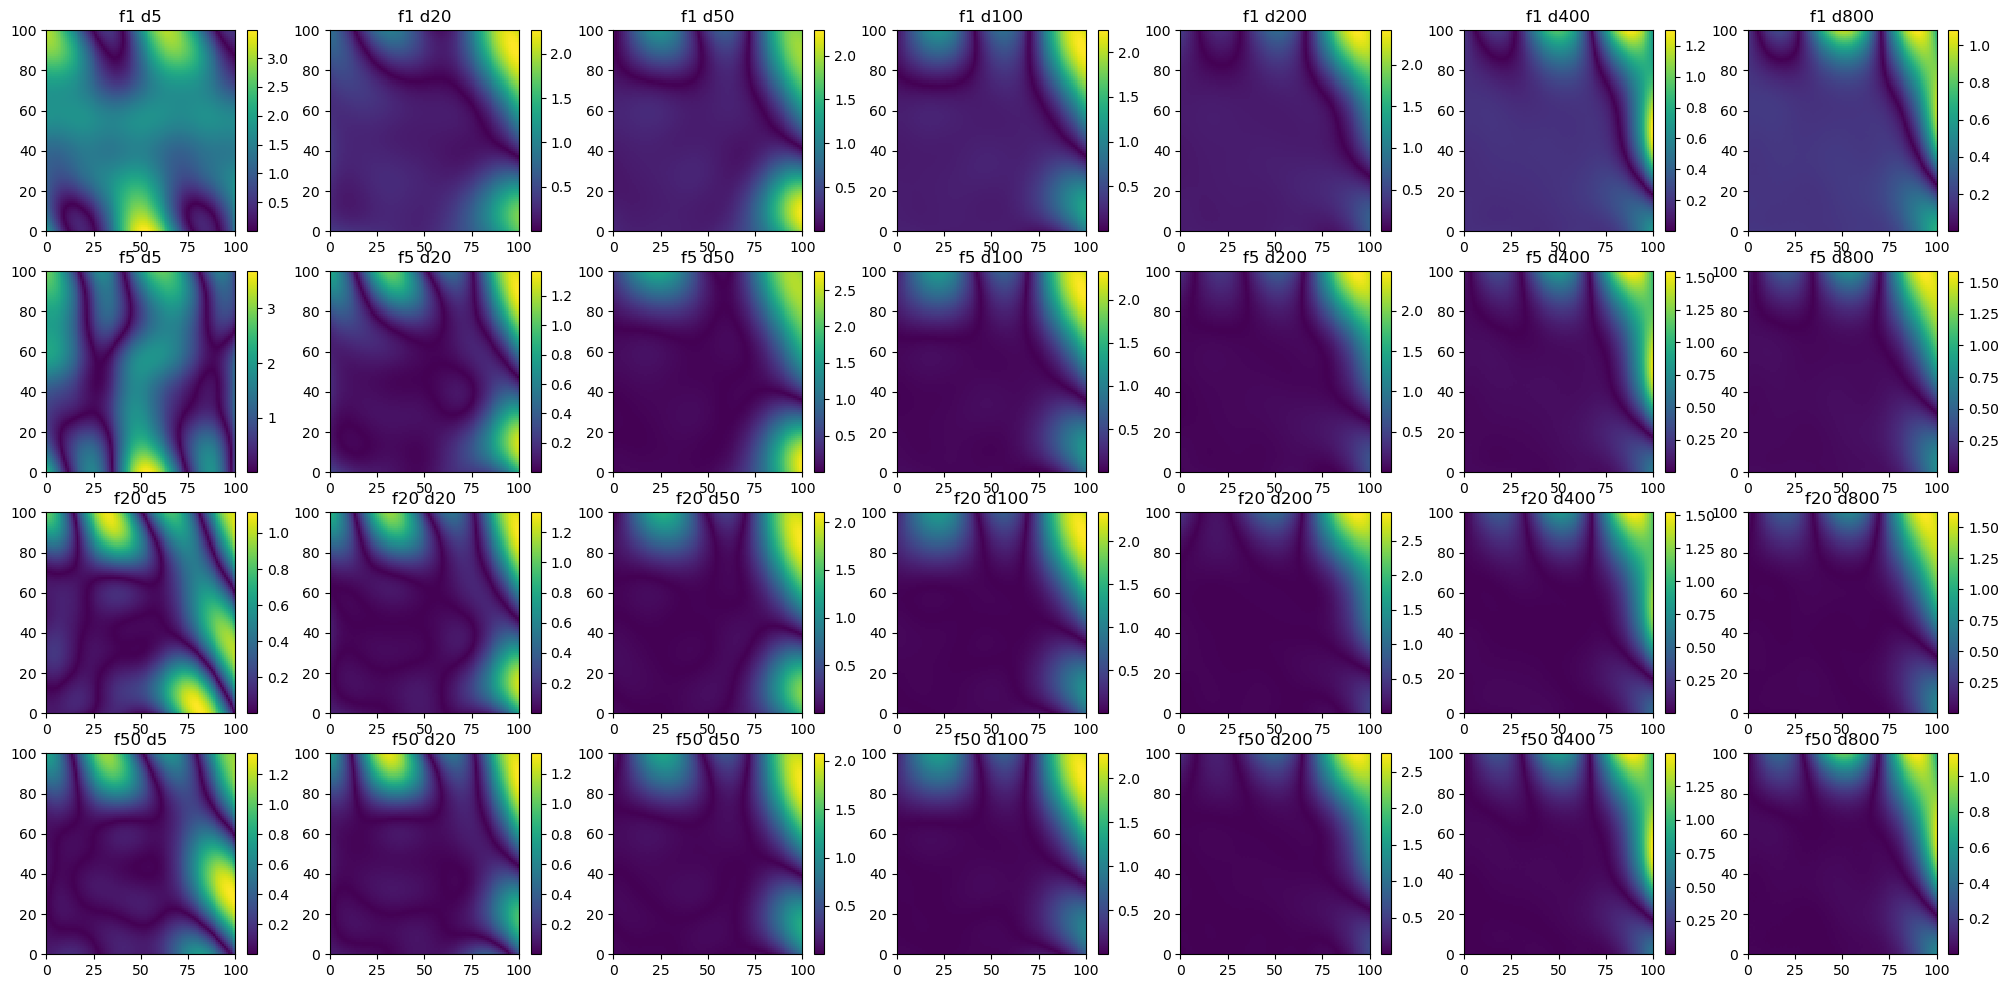

In [ ]:
# optimizer = "TNC"
optimizer = "L-BFGS-B"
# optimizer = "SLSQP"

for name, test_ran in zip(names, test_rans):
    fig, ax = plt.subplots(4,7, figsize=(25,12))

    _, Y_test = optimizertesting.create_training_data_2D(seed, num_gridpoints, test_ran, 0.0, fun)
    Y_test = Y_test[:,0]
    for i,num_f_vals in enumerate(f_vals):
        for j,num_d_vals in enumerate(d_vals):
            means = jnp.load(f"{in_dir}/sin_{name}pi_f{num_f_vals}d{num_d_vals}means{optimizer}.npz")
            mean = means["arr_1"]
            
            ax[i,j].set_title(f"f{num_f_vals} d{num_d_vals}")
            im = ax[i,j].pcolormesh(jnp.abs(mean-Y_test).reshape(100,100))
            fig.colorbar(im, ax=ax[i,j])